In [1]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy as sp
from pprint import pprint
import quandl
from config import quandl_key
import numpy as np

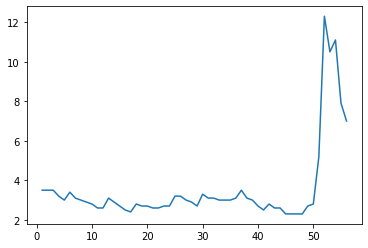

In [2]:
denver_employment = pd.read_csv("data/denver_bls.csv")
unemployment_months = range(1,57, 1)
employment_dated = denver_employment.loc[denver_employment['Year'] >= 2016]
#employment_dated
plt.plot(unemployment_months, employment_dated['unemployment rate'])

In [3]:
colorado_employment = pd.read_csv("co_unemployment2010_2020.csv")
unemployment_months = range(1,57, 1)
co_employment_dated = colorado_employment.loc[colorado_employment['Year'] >= 2016]
co_employment_dated

,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate
72,2016,Jan,66.7,64.4,2855252,2756418,98834,3.5
73,2016,Feb,66.8,64.5,2863147,2764171,98976,3.5
74,2016,Mar,66.8,64.5,2869786,2770611,99175,3.5
75,2016,Apr,66.8,64.5,2875505,2776260,99245,3.5
76,2016,May,66.9,64.6,2881161,2782143,99018,3.4
77,2016,Jun,66.9,64.6,2887327,2789101,98226,3.4
78,2016,Jul,66.9,64.7,2894043,2797416,96627,3.3
79,2016,Aug,67.0,64.8,2901038,2806630,94408,3.3
80,2016,Sep,67.1,64.9,2908063,2816018,92045,3.2
81,2016,Oct,67.1,65.0,2914759,2825162,89597,3.1


In [4]:
indicators_url = "https://www.quandl.com/api/v3/datatables/ZILLOW/INDICATORS.json?&api_key="
query_url = indicators_url + quandl_key
response = requests.get(query_url).json()
pprint(json.dumps(response, indent=4, sort_keys=True))

('{\n'
 '    "datatable": {\n'
 '        "columns": [\n'
 '            {\n'
 '                "name": "indicator_id",\n'
 '                "type": "text"\n'
 '            },\n'
 '            {\n'
 '                "name": "indicator",\n'
 '                "type": "text"\n'
 '            },\n'
 '            {\n'
 '                "name": "category",\n'
 '                "type": "text"\n'
 '            }\n'
 '        ],\n'
 '        "data": [\n'
 '            [\n'
 '                "ZSFH",\n'
 '                "ZHVI Single-Family Homes Time Series ($)",\n'
 '                "Home values"\n'
 '            ],\n'
 '            [\n'
 '                "ZCON",\n'
 '                "ZHVI Condo/Co-op Time Series ($)",\n'
 '                "Home values"\n'
 '            ],\n'
 '            [\n'
 '                "ZATT",\n'
 '                "ZHVI All Homes- Top Tier Time Series ($)",\n'
 '                "Home values"\n'
 '            ],\n'
 '            [\n'
 '                "ZALL",\n'
 '      

In [5]:
regions_url = "https://www.quandl.com/api/v3/datatables/ZILLOW/regions.json?region_type=city&api_key="
rquery_url = regions_url + quandl_key
r_response = requests.get(rquery_url).json()
#print(json.dumps(r_response, indent=4, sort_keys=True))
region_ids = pd.read_csv('data/zillow_region_ids.csv')
#region_ids
#region_ids[region_ids['Neighborhood'].str.contains('Denver')]
region_ids[region_ids['State_abrv'].str.contains('CO')]


,Region_id,Region_type,City_Name,State_abrv,Neighborhood,County
184,9594,city,Rocky Ford,CO,Otero County,NaN
206,9547,city,Weston,CO,Las Animas County,NaN
298,9328,city,Tabernash,CO,Grand County,NaN
395,9094,city,Pleasant View,CO,Montezuma County,NaN
405,9061,city,Mesa,CO,Grand Junction,Mesa County
...,...,...,...,...,...,...
9793,41283,city,Trinidad,CO,Las Animas County,NaN
9853,41152,city,Swink,CO,Otero County,NaN
9875,41110,city,Sugar City,CO,Crowley County,NaN
9958,4095,city,Chromo,CO,Archuleta County,NaN


In [6]:
co_region_ids = [11093, 16846, 5519, 20793, 34781, 10181, 44515, 38992, 33334, 10574, 23984, 17545, 19055, 17163, 4592,
                 26213, 119842, 50547, 45470, 24634, 119404,
                 12834, 24367, 120381, 7811, 38807, 46297, 17755, 52003, 4548, 119221, 13759, 119157, 55662, 4197,
                 16865, 120317, 37852, 36384, 7507, 44909, 119469, 8471, 39098, 52230, 38324, 120500, 13288, 16394,
                 49882, 120020, 395432, 21854, 17754, 119632, 22800, 119114, 56787, 24366, 24665, 4960, 52196, 120107,
                 8179, 119390, 36867, 16729, 46104, 46323, 24170, 120333, 11824, 50963, 24590, 11751, 31633, 12042,
                 120074, 13856, 45936, 55580, 39666, 54425, 396043, 42203, 23185, 30476, 6510, 396035, 16589, 50328]

In [7]:
#data = quandl.get_table('ZACKS/FC', paginate=True, ticker=['AAPL', 'MSFT'],
#per_end_date={'gte': '2015-01-01'}, qopts={'columns':['ticker', 'per_end_date']})
isaw_data = quandl.get_table("ZILLOW/DATA", api_key=quandl_key,
                             indicator_id='ISAW', paginate=True)#, region_id = co_region_ids)
isaw_data



#np.where(data['region_id']==4592)
#per_end_date={'gte': '2016-04-26'}

,indicator_id,region_id,date,value
None,,,,
0,ISAW,753924,2020-10-03,3541.0
1,ISAW,753924,2020-09-26,3560.0
2,ISAW,753924,2020-09-19,3587.0
3,ISAW,753924,2020-08-29,3774.0
4,ISAW,753924,2020-08-22,3771.0
...,...,...,...,...
17627,ISAW,102001,2017-11-04,1325207.0
17628,ISAW,102001,2017-10-28,1329289.0
17629,ISAW,102001,2017-10-21,1334286.0


In [12]:
data3.loc[data3['region_id']=='753924']

,region_id,region_type,region
None,,,
22766,753924,metro,"Urban Honolulu, HI"


In [18]:
data3.loc[data3['region'].str.contains('Breckenridge')]

,region_id,region_type,region
None,,,
4611,93431,zip,80498; CO; Breckenridge; Summit County; Silver...
4612,93430,zip,80497; CO; Breckenridge; Summit County; Silver...
4650,93394,zip,80443; CO; Breckenridge; Summit County; Frisco
4656,93387,zip,80435; CO; Breckenridge; Summit County; Keystone
4663,93377,zip,80424; CO; Breckenridge; Summit County
6073,91428,zip,76481; TX; Stephens County; Breckenridge
6113,91385,zip,76424; TX; Stephens County; Breckenridge
10070,86507,zip,64625; MO; Kansas City; Caldwell County; Breck...
12126,8412,city,Frisco; CO; Breckenridge; Summit County


In [ ]:
z1br= quandl.get_table('Zillow/Data', api_key=quandl_key, indicator_id = 'Z1BR', paginate=True, region_id = co_region_ids)
z1br

In [14]:
#get region names to merge with CO metro ids
metro_merge = data3
co_metro_merge = pd.merge(isaw_data, co_metros, on=['region_id'])
co_metro_merge
boulder_isaw = co_metro_merge.loc[co_metro_merge['region_id']=='394405']
boulder_isaw.sort_values(['date'], ascending=True)


,indicator_id,region_id,date,value,region_type,region
923,ISAW,394405,2017-10-07,1197.0,metro,"Boulder, CO"
922,ISAW,394405,2017-10-14,1190.0,metro,"Boulder, CO"
921,ISAW,394405,2017-10-21,1186.0,metro,"Boulder, CO"
920,ISAW,394405,2017-10-28,1174.0,metro,"Boulder, CO"
919,ISAW,394405,2017-11-04,1152.0,metro,"Boulder, CO"
...,...,...,...,...,...,...
774,ISAW,394405,2020-08-22,949.0,metro,"Boulder, CO"
773,ISAW,394405,2020-08-29,947.0,metro,"Boulder, CO"
772,ISAW,394405,2020-09-19,920.0,metro,"Boulder, CO"
771,ISAW,394405,2020-09-26,922.0,metro,"Boulder, CO"


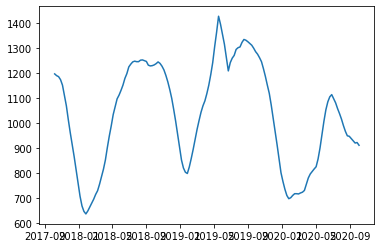

In [15]:
plt.plot(boulder_isaw['date'], boulder_isaw['value'],)

In [ ]:
isaw = quandl.get_table('Zillow/Data', api_key=quandl_key, indicator_id = 'ISAW', paginate=True, region_id = co_metro_ids)
#isaw
isaw["date"]= pd.to_datetime(isaw["date"])
isaw_dated =isaw.loc[isaw["date"] > "2016-04-01"]
#isaw
isaw_dated

In [ ]:
#quandl.bulkdownload("ZILLOW/DATA", quandl_key)
#zillow_data = quandl.export_table('ZILLOW/DATA', api_key=quandl_key)

In [ ]:
data2 = quandl.get_table("ZILLOW/INDICATORS", api_key="YOUR KEY HERE")
data2

In [11]:
#REGIONS TABLE
data3 = quandl.get_table("ZILLOW/REGIONS", api_key=quandl_key, paginate=True)
data3
#FOUND CO COUNTIES
co_region = data3[data3['region'].str.contains('CO')]
co_county = co_region[co_region['region_type']=='county']
co_county_ids = co_county['region_id'].tolist()
co_metros = co_region[co_region['region_type']=='metro']
co_metro_ids = co_metros['region_id'].tolist()
print(co_metro_ids)
#print(co_county_ids)

['753921', '753881', '753874', '753871', '395130', '395007', '394876', '394645', '394639', '394606', '394602', '394556', '394547', '394530', '394484', '394437', '394405']
